$\newcommand{\xv}{\mathbf{x}}
\newcommand{\Xv}{\mathbf{X}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Wv}{\mathbf{W}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\Tv}{\mathbf{T}}
\newcommand{\muv}{\boldsymbol{\mu}}
\newcommand{\sigmav}{\boldsymbol{\sigma}}
\newcommand{\phiv}{\boldsymbol{\phi}}
\newcommand{\Phiv}{\boldsymbol{\Phi}}
\newcommand{\Sigmav}{\boldsymbol{\Sigma}}
\newcommand{\Lambdav}{\boldsymbol{\Lambda}}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\argmax}[1]{\underset{#1}{\operatorname{argmax}}}
\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}}}$

# Assignment 4: Classification with LDA and Logistic Regression

Yashad Samant

## Overview

The basis of this assignment is to compare the performance of LDA and Linear and Non-Linear Logistic regression methods on two different data sets. Basically, all the three methods are state-of-the-art classification algorithms, hence we test the performance of these algorithms by training the model according to the data sets into different classes using the train data set and test it on test data set and check accuracy.

### Linear Discriminant Analysis

Classification becomes more complicated as the number of classes increases. As the number of classes is equal to number of discriminants.

For classification, Gaussian or normal distribution function is used because we can vary various parameters and d-dimensions are incorporated in the function. The function is given by:
$$
p(\xv) = \frac{1}{2\pi^{d/2} |\Sigmav |^{1/2}}
      e^{-\frac{1}{2} (\xv-\muv)^T \Sigmav^{-1} (\xv - \muv)}
$$

where mean $\muv$ is a $d$-dimensional column vector and covariance
matrix $\Sigmav$ is a $d\times d$ symmetric matrix.

It also helps us to take care of the masking problem discussed in the lecture.

If we define each side of this last inequality as a discriminant function, $\delta_k(\xv)$ for
Class $k$, then

$$
      \begin{align*}
        \delta_k(\xv) = -\frac{1}{2} \ln |\Sigma_k| -\frac{1}{2}(\xv-\muv_k)^T
\Sigma_k^{-1} (\xv-\muv_k) + \ln P(C=k)
      \end{align*}
$$

and the class of a new sample $\xv$ is $\argmax{k}\; \delta_k(\xv)$.

The boundary between Class 1 and Class 2 is the set of points $\xv$
for which $\delta_2(\xv) = \delta_1(\xv)$. This equation
is quadratic in $\xv$, meaning that the boundary between Class 1 and 2
is quadratic.  We have just defined **Quadratic Discriminant Analysis,
or QDA**.  


QDA is simple but not robust. QDA is function of covariance matrices of each and every discriminant function. If the data is overfitted or in simple terms if two rows of the matrix give the same information or if the rank of the matrix is less than d, then the matrix is termed as singular i.e. the determinant of the matrix is 0 and hence inverse of the matrix is undefined.

Thus, to take this into consideration we average out all the covariace matrices into one matrix which is common for all discriminant functions. This gives us the defination of the **Linear Discriminant Analysis or LDA**.

Above we showed that if we assume the same covariance matrix, $\Sigmav$, for each class, where 
$$
\begin{align*}
\Sigmav = \sum_{k=1}^K \frac{N_k}{N} \Sigmav_k,
\end{align*}
$$
our discriminant function becomes
$$
      \begin{align*}
        \delta_k(\xv) = \xv^T \Sigmav^{-1} \muv_k - \frac{1}{2}\muv_k^T \Sigmav^{-1} \muv_k + \log
        P(C=k)
      \end{align*}
$$

Linear discriminant analysis (LDA) is a generalization of Fisher's linear discriminant, a method used in statistics, pattern recognition and machine learning to find a linear combination of features that characterizes or separates two or more classes of objects or events. The resulting combination may be used as a linear classifier, or, more commonly, for dimensionality reduction before later classification.

## Required Code

For this assignment, I have used neuralnetworks.py, mlutils.py and qdalda.py discussed in the lecture. 

In [39]:
#Importing libraries
import numpy as np
import mlutils as ml
import neuralnetworks as nn
import qdalda as ql
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
def trainLDA(X, T, parameters=None):
    lda = ql.LDA()
    lda.train(X, T)
    return lda

def evaluateLDA(model, X, T):
    c, prob, d = model.use(X)
    error = np.sum(c==T)/X.shape[0] * 100
    return error

### LDA Python Definition

LDA is implementation is obtained using two functions-:

a) trainLDA - I have used qdalda.py implemented in the class. It consists of QDA and LDA classes. As we are implementing LDA, we only call for ql.LDA(). LDA class includes the implementation of QDA class as well, as the only change between the two classes is the discriminant function. Hence, we define a new discriminant function for LDA.

So when we call for train function, train function from class QDA is called which in turn calls the finishtrain function in LDA, thus returning the model lda.

b) evaluateLDA - model is the output formed by trainLDA, std, mean etc which we use in use function in qdalda. Using model.use(), we obtain predicted classes, probabilities and discriminant. Using the formula for percent error, we calculate error as shown in the fuction and return it.  

### Linear and Non-linear logistic regression

In LDA, we used the normal distribution function to remove the masking problem. But using linear and non-linear logistic regression, we can use linear model that predicts $p(C=k|\xv)$ and avoid the masking problem. 

To go about this method, our objective is to maximize the data likelihood $$
    \begin{align*}
      L(\wv) & = \prod_{n=1}^N \prod_{k=1}^K p(C=k\,|\, \xv_n) ^ {t_{n,k}}
    \end{align*}
$$
by taking the derivative or the gradient of w and use logarithms to simplify the calculations.

$$
    \begin{align*}
      LL(\wv) = \log L(\wv) = \sum_{n=1}^N \sum_{k=1}^K t_{n,k}  \log p(C=k\,|\,\xv_n)
    \end{align*}
$$

In our regressions algorithms, we were supposed to reduce the error by reducing the weights using gradient descent but to maximize weight we have to use gradient ascent.

$$
    \begin{align*}
        \wv_j  \leftarrow \wv_j + \alpha \sum_{n=1}^N
        (t_{n,j} - g_j(\xv_n)) \xv_n
        \end{align*}
$$

In [41]:
def trainNN(X, T, parameters):
    classes = len(np.unique(T))
    nnet = nn.NeuralNetworkClassifier(X.shape[1], parameters[0], classes)
    nnet.train(X, T, nIterations=parameters[1], verbose=False)
    return nnet

def evaluateNN(model, X, T):
    Y = model.use(X)
    error = np.sum(Y==T)/X.shape[0] * 100
    return error

### Neural Network Logistic Regression Python Definitions

a) trainNN - Again, this is similar to LDA. Here, instead of class LDA, class NeuralNetworkClassifier is called where all the parameters are initialized. Then, we use train function within the the class to obtain the values for the model. Eg - weights, std etc. We return this model and call it in evaluateNN.

b) evaluateNN - Here, it's exactly same as LDA. But instead of three values as in LDA, we obtain just the predicted output Y. We compare it with Target T and calculate the percent error.

In neural network, we have two methods, linear and non-linear logistic regression. But the only difference between the two is the number of hidden layers in between the input and output layers. If h = 0, then it's linear logistic regression otherwise non-linear.

In [42]:
def printResults(label,results):
    print('{:4s} {:>20s}{:>8s}{:>8s}{:>8s}'.format('Algo','Parameters','TrnAcc','ValAcc','TesAcc'))
    print('-------------------------------------------------')
    for row in results:
        # 20 is expected maximum number of characters in printed parameter value list
        print('{:>4s} {:>20s} {:7.2f} {:7.2f} {:7.2f}'.format(label,str(row[0]),*row[1:]))

## Data

Both the datas are obtained from UCI repository for machine learning. Data is chosen on the basis of the number of instances. I have deliberately chosen data with minimum instances to check if classification methods works well with less amount of data.

### DATA#1 - FERTILITY

Number of Instances: 100

Number of Attributes: 10 (including the class attribute)

Attribute Information:
    Season in which the analysis was performed. 1) winter, 2) spring, 3) Summer, 4) fall. (-1, -0.33, 0.33, 1) 

    Age at the time of analysis. 18-36 (0, 1) 

    Childish diseases (ie , chicken pox, measles, mumps, polio) 1) yes, 2) no. (0, 1) 

    Accident or serious trauma 1) yes, 2) no. (0, 1) 

    Surgical intervention 1) yes, 2) no. (0, 1) 

    High fevers in the last year 1) less than three months ago, 2) more than three months ago, 3) no. (-1, 0, 1) 

    Frequency of alcohol consumption 1) several times a day, 2) every day, 3) several times a week, 4) once a week, 5) hardly     ever or never (0, 1) 

    Smoking habit 1) never, 2) occasional 3) daily. (-1, 0, 1) 

    Number of hours spent sitting per day ene-16 (0, 1) 

    Output: Diagnosis normal (N), altered (O) 

X shape: (100, 9)
T shape: (100, 1)


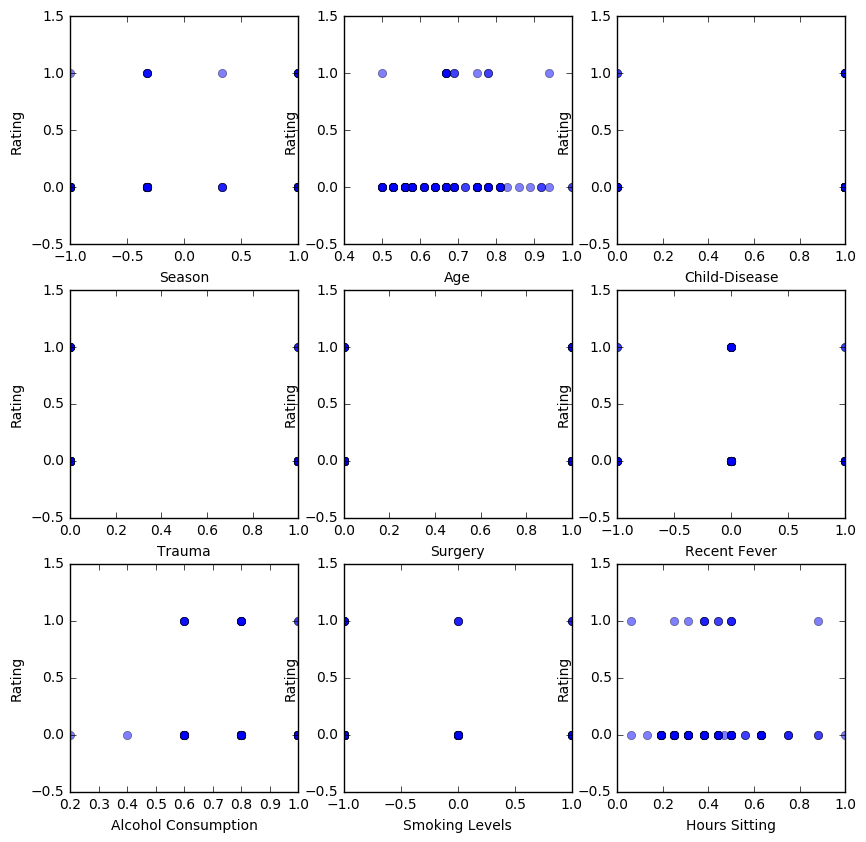

In [43]:
def load_fertility(file_name='fertility.txt'):
    fert_convert = lambda x: 0 if b'N' in x else 1
    data = np.loadtxt(file_name, delimiter=',', converters={9: fert_convert})

    X = data[:,:-1]
    T = data[:,-1].reshape( (X.shape[0], 1) )

    print("X shape: {}".format(X.shape))
    print("T shape: {}".format(T.shape))

    names = [ 'Season', 'Age', 'Child-Disease', 'Trauma', 'Surgery', 'Recent Fever', 
            'Alcohol Consumption', 'Smoking Levels', 'Hours Sitting', 'Diagnosis']

    return X, T, names

X, T, names = load_fertility()

## Visualize fert
plt.figure(figsize=(10,10))
first_plot_set = range(9)
second_plot_set = range(9,X.shape[1])
for c in first_plot_set:
    plt.subplot(3,3, c+1)
    plt.ylim(-0.5, 1.5)
    plt.plot(X[:,c], T, 'o', alpha=0.5)
    plt.ylabel("Rating")
    plt.xlabel(names[c])
    

In [44]:
# LDA
results_lda = ml.trainValidateTestKFoldsClassification(trainLDA, evaluateLDA, X, T, [None], nFolds=5, shuffle=False,verbose=False)
printResults('LDA:', results_lda)


Algo           Parameters  TrnAcc  ValAcc  TesAcc
-------------------------------------------------
LDA:                 None   72.92   66.21   48.28
LDA:                 None   68.37   58.88   66.67
LDA:                 None   67.00   59.00   80.00
LDA:                 None   67.65   63.26   65.22
LDA:                 None   75.00   67.90   57.14


C:\Users\Yashad\Desktop\Books\machine learning\qdalda.py:102: RuntimeWarning: invalid value encountered in log
  - 0.5*np.sum(np.dot(Xs,self.sigmaMeanInv) * Xs, axis=1).reshape((-1,1)))


In [45]:
# Linear Logistic Regression
results_lr = ml.trainValidateTestKFoldsClassification(trainNN, evaluateNN, X, T, [ [[0], 15], [[0], 300], [[0], 425], [[0], 500], [[0], 600]], nFolds=5, shuffle=False,verbose=False)
printResults('LR:', results_lr)


Algo           Parameters  TrnAcc  ValAcc  TesAcc
-------------------------------------------------
 LR:            [[0], 15]   80.21   70.88   51.72
 LR:            [[0], 15]   76.53   65.80   70.37
 LR:            [[0], 15]   71.00   63.49   76.00
 LR:            [[0], 15]   72.55   65.06   73.91
 LR:            [[0], 15]   74.04   69.85   66.67


In [8]:
# Non-linear logistic regression
results_nlr = ml.trainValidateTestKFoldsClassification(trainNN, evaluateNN, X, T, [ [[3], 575], [[4], 400], [[5], 325], [[6], 200], [[7], 100] ], nFolds=5, shuffle=False,verbose=False)
printResults('NLR:', results_nlr)


Algo           Parameters  TrnAcc  ValAcc  TesAcc
-------------------------------------------------
NLR:           [[5], 325]   98.96   88.46   79.31
NLR:           [[7], 100]   98.98   81.94   96.30
NLR:           [[7], 100]   99.00   83.72   96.00
NLR:           [[6], 200]  100.00   83.84   82.61
NLR:           [[7], 100]   99.04   85.68   90.48


In [47]:
# Confusion matrix
lda = ql.LDA()
lda.train(X,T)
predictedClasses,_,discriminants = lda.use(X)
ml.confusionMatrix(T,predictedClasses,np.unique(T)); # <- semi-colon prevents printing of returned result

       0    1
    ------------
 0 | 72.7 27.3   (88 / 88)
 1 | 33.3 66.7   (12 / 12)


### DATA#2 - TEACHING ASSISSTANT

In [50]:
print(discriminants)

[[ -2.66203474e-02  -3.55875095e-01]
 [ -2.76894916e-01   1.47947174e+00]
 [  6.83547211e-02  -1.05235893e+00]
 [  1.71661597e-01  -1.80994269e+00]
 [  7.99918372e-02  -1.13769778e+00]
 [ -1.49652915e-01   5.46363731e-01]
 [ -1.20069006e-01   3.29415066e-01]
 [ -1.76271376e-01   7.41565784e-01]
 [ -9.16452119e-02   1.20973912e-01]
 [ -2.49044693e-02  -3.68458200e-01]
 [ -6.49802814e-02  -7.45689118e-02]
 [ -1.01247427e-01   1.91390158e-01]
 [ -6.03379156e-02  -1.08612928e-01]
 [ -1.74901544e-01   7.31520349e-01]
 [ -3.58715850e-01   2.07949192e+00]
 [ -6.36783753e-02  -8.41162233e-02]
 [ -9.70369194e-02   1.60513101e-01]
 [ -1.68906975e-01   6.87560173e-01]
 [  1.73100065e-02  -6.78031023e-01]
 [ -2.15959140e-01   1.03260939e+00]
 [ -1.08951517e-01   2.47886815e-01]
 [ -2.83049285e-01   1.52460378e+00]
 [  5.01890983e-02  -9.19144363e-01]
 [ -2.18963925e-01   1.05464448e+00]
 [ -1.17466981e-01   3.10333555e-01]
 [ -5.95170793e-02  -1.14632394e-01]
 [ -2.69639069e-01   1.42626219e+00]
 

Number of Instances: 151

Number of Attributes: 6 (including the class attribute)

Attribute Information:
  
   Whether of not the TA is a native English speaker (binary)
      1=English speaker, 2=non-English speaker
      
   Course instructor (categorical, 25 categories)
   
   Course (categorical, 26 categories)
   
   Summer or regular semester (binary) 1=Summer, 2=Regular
   
   Class size (numerical)
   
   Class attribute (categorical) 1=Low, 2=Medium, 3=High



In [51]:
print(predictedClasses)

[[ 0.]
 [ 1.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 0.]
 [ 1.]
 [ 1.]
 [ 0.]
 [ 1.]
 [ 1.]
 [ 0.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 0.]
 [ 1.]
 [ 1.]
 [ 0.]
 [ 1.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 1.]
 [ 0.]
 [ 1.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 0.]
 [ 1.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 0.]
 [ 1.]
 [ 1.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]


X shape: (15087, 32)
T shape: (15087, 1)
[[  2.   3.   4. ...,  31.  32.  33.]
 [  1.   0.   6. ...,   0.   0.   0.]
 [  0.   0.   6. ...,   0.   3.   0.]
 ..., 
 [  0.   0.   0. ...,   0.   2.   0.]
 [  0.   0.   0. ...,   0.   2.   0.]
 [  0.   0.   0. ...,   0.   1.   0.]]
[[ 1.]
 [ 7.]
 [ 3.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]


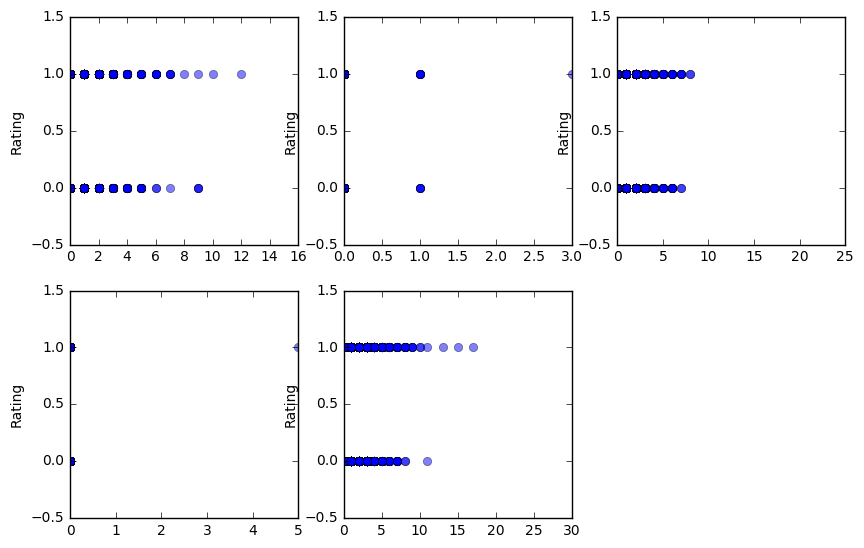

In [7]:
def loadtae(file_name='BDpro.txt'):
    data = np.loadtxt(file_name, delimiter=',')
    
    X = data[:,1:-2]
    #np.delete(X,0,1)
    T = data[:,0].reshape( (X.shape[0], 1) )
    
    print("X shape: {}".format(X.shape))
    print("T shape: {}".format(T.shape))

    #names = [ 'English speaker', 'Course Instructor', 'Course', 'Semester', 'class size', 'class']

    return X, T

X, T = loadtae()
print (X)
print(T)
## Visualize tae
plt.figure(figsize=(10,10))
first_plot_set = range(5)
second_plot_set = range(5,X.shape[1])
for c in first_plot_set:
    plt.subplot(3,3, c+1)
    plt.ylim(-0.5, 1.5)
    plt.plot(X[:,c], T, 'o', alpha=0.5)
    plt.ylabel("Rating")
    #plt.xlabel(names[c])
    

In [8]:
# LDA
results_lda = ml.trainValidateTestKFoldsClassification(trainLDA, evaluateLDA, X, T, [None], nFolds=5, shuffle=False,verbose=False)
printResults('LDA:', results_lda)

ValueError: trainValidateTestKFoldsClassification: Number of samples in each fold for class 34 is 0.

In [12]:
# Linear Logistic Regression
results_lr = ml.trainValidateTestKFoldsClassification(trainNN, evaluateNN, X, T, [ [[0], 15], [[0], 300], [[0], 425], [[0], 500], [[0], 600]], nFolds=5, shuffle=False,verbose=False)
printResults('LR:', results_lr)

ValueError: trainValidateTestKFoldsClassification: Number of samples in each fold for class 2 is 0.

In [13]:
# Non-linear logistic regression
results_nlr = ml.trainValidateTestKFoldsClassification(trainNN, evaluateNN, X, T, [ [[3], 575], [[4], 400], [[5], 325], [[6], 200], [[7], 100] ], nFolds=5, shuffle=False,verbose=False)
printResults('NLR:', results_nlr)

ValueError: trainValidateTestKFoldsClassification: Number of samples in each fold for class 2 is 0.

In [9]:
# Confusion matrix
lda = ql.LDA()
lda.train(X,T)
predictedClasses,_,_ = lda.use(X)
ml.confusionMatrix(T,predictedClasses,np.unique(T));

ValueError: all input arrays must have the same shape

## Results

1} Explanation of the funtions are given in the respective cells below it.

2} While testing on both data sets, we observe that fertility data set tend to show better results as compared to teaching assisstant data set giving 96% accuracy in testing data for one of the folds but we don't get comparable accuracy with the other data set.

3} Results based on the observation obtained from the tables formed from the three methods are as follows:
  
  a) I have implemented the confusion matrix for both the data sets. It is used to get how many values are correctly classified.      On the basis of the confusion matrix printed for both data 1 and data 2 suggests that:
     
     For Data 1, class 0 is correct 72% of times while class 1 is correct  for about 66%.
     
     For Data 2, class 1 is correct for 73%, class 2 is correct just 44% and class 3 is correct only  51% times. 
     
   This explains why data 1 was better than data 2 in terms of accuracy, in fact hitting as high as 96% accuracy with NLR.    
  
  b) LDA - It doesn't have any parameters, hence we cannot distinguish it in terms on parameters.
     
   LR - For LR, we see we can vary the number of iterations but from the output of both data sets, it is clear that iterations hardly have any effect on the output.
     
   NLR - For NLR, we see that hidden layers have positive impact on the accuracy but it's not a thumb rule. We see in fertility data that even with 4 hidden layers we have managed to obtain 96% accuracy. Thus, indicating that iterations have some effect on accuracy as well.

4}  a) Fertility data set -: Non-linear logistic regression method works best for all the folds. 

   b) Teaching Assisstant data set -: Non-linear logistic regression method works best for all the folds.  

## Grading

Your notebook will be run and graded automatically. Download [A4grader.tar](http://www.cs.colostate.edu/~anderson/cs480/notebooks/A4grader.tar)  and extract A4grader.py from it. Run the code in the following cell to demonstrate an example grading session. You should see a perfect score of 80/100 if your functions are defined correctly. 

The remaining 20% will be based on your writing.  Be sure to explain each function, and details of the results summarized in the above section. 

## Check-in

Do not include this section in your notebook.

Name your notebook ```Lastname-A4.ipynb```.  So, for me it would be ```Anderson-A4.ipynb```.  Submit the file using the ```Assignment 4``` link on [Canvas](https://colostate.instructure.com/courses/41327).

Grading will be based on 

  * correct behavior of the required functions,
  * readability of the notebook,
  * effort in making interesting observations, and in formatting your notebook,
  * testing your code on two different classification data sets of your choice.

In [22]:
%run -i A4grader.py


   Testing   model = trainLDA(X,T)
             accuracy = evaluateLDA(model,X,T)

20/20 points. Accuracy is within 10 of correct value 50%

   Testing   model = trainNN(X,T, [[5],100])
             accuracy = evaluateNN(model,X,T)

30/30 points. Accuracy is within 10 of correct value 100%

  Testing
    resultsNN = ml.trainValidateTestKFoldsClassification( trainNN,evaluateNN, X,T, 
                                                          [ [ [0], 5], [ [10], 100] ],
                                                          nFolds=3, shuffle=False,verbose=False)
    bestParms = [row[0] for row in resultsNN]


30/30 points. You correctly find the best parameters to be [[10],100] for each fold.

C:\Users\Yashad\Desktop\Books\machine learning CODING GRADE is 80/80

C:\Users\Yashad\Desktop\Books\machine learning WRITING GRADE is ??/20

C:\Users\Yashad\Desktop\Books\machine learning FINAL GRADE is ??/100

Remember, this python script is just an example of how your code will be graded.
Do 